To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# No need for an open connection, as we're only doing a single query
engine.dispose()

In [2]:
student_df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

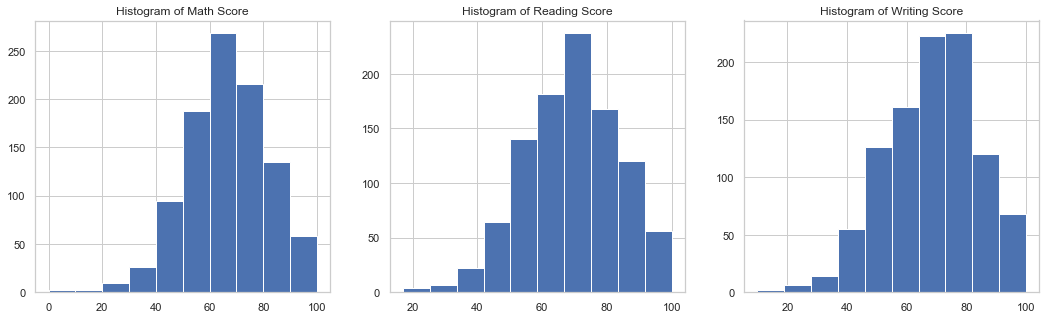

In [3]:
# Histograms of exam score variables
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(student_df['math score'])
plt.title('Histogram of Math Score')

plt.subplot(1, 3, 2)
plt.hist(student_df['reading score'])
plt.title('Histogram of Reading Score')

plt.subplot(1, 3, 3)
plt.hist(student_df['writing score'])
plt.title('Histogram of Writing Score')

plt.show()

In [4]:
# Use jarque_bera and normaltest to verify distributions
jb_stats = jarque_bera(student_df['math score'])
norm_stats = normaltest(student_df['math score'])

print('Jarque-Bera test statistic is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df['reading score'])
norm_stats = normaltest(student_df['reading score'])

print('Jarque-Bera test statistic is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df['writing score'])
norm_stats = normaltest(student_df['writing score'])

print('Jarque-Bera test statistic is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistic is 15.912256686712709 and p-value is 0.0003505075386818213
Normality test statistic is 15.408960513931822 and p-value is 0.00045080293869937836
Jarque-Bera test statistic is 11.383300575987892 and p-value is 0.0033740202672214448
Normality test statistic is 11.11741279628622 and p-value is 0.003853758403576582
Jarque-Bera test statistic is 13.98509448257235 and p-value is 0.0009187033894586527
Normality test statistic is 13.606450837263859 and p-value is 0.0011101885439899974


The exam scores are not normally distributed (all three are slightly skewed to the left).

In [5]:
student_df['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

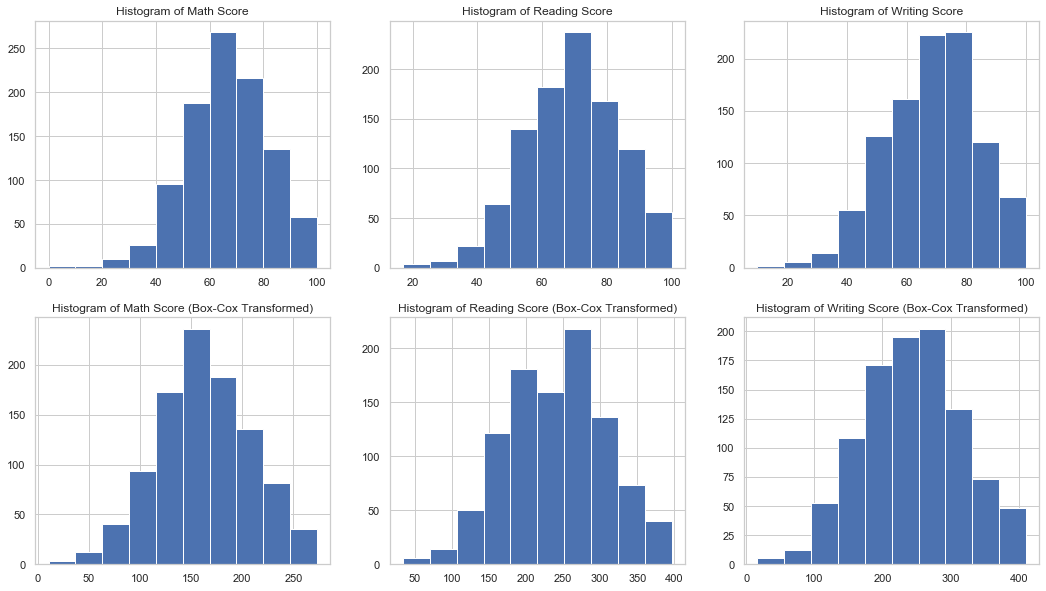

In [6]:
# Apply box-cox transformation to exam score variables
# Excluding math score equal to 0 because box-cox only works with 
# positive numbers
math_boxcox,_ = boxcox(student_df[student_df['math score'] > 0]['math score'])
reading_boxcox,_ = boxcox(student_df['reading score'])
writing_boxcox,_ = boxcox(student_df['writing score'])

# Histograms of box-cox transformed data
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.hist(student_df['math score'])
plt.title('Histogram of Math Score')

plt.subplot(2, 3, 2)
plt.hist(student_df['reading score'])
plt.title('Histogram of Reading Score')

plt.subplot(2, 3, 3)
plt.hist(student_df['writing score'])
plt.title('Histogram of Writing Score')

plt.subplot(2, 3, 4)
plt.hist(math_boxcox)
plt.title('Histogram of Math Score (Box-Cox Transformed)')

plt.subplot(2, 3, 5)
plt.hist(reading_boxcox)
plt.title('Histogram of Reading Score (Box-Cox Transformed)')

plt.subplot(2, 3, 6)
plt.hist(writing_boxcox)
plt.title('Histogram of Writing Score (Box-Cox Transformed)')

plt.show()

In [7]:
# Use jarque_bera and normaltest to verify box-cox transformed distributions
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print('Jarque-Bera test statistic is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print('Jarque-Bera test statistic is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print('Jarque-Bera test statistic is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistic is 1.7200982636836308 and p-value is 0.42314129209599327
Normality test statistic is 1.8323075851586939 and p-value is 0.4000547794685686
Jarque-Bera test statistic is 4.119778573559666 and p-value is 0.127468081515408
Normality test statistic is 5.282274606965809 and p-value is 0.07128015626992971
Jarque-Bera test statistic is 4.746478090042761 and p-value is 0.09317842784043195
Normality test statistic is 6.267311355052559 and p-value is 0.04355827085003712


The box-cox transformation makes all three variables more normal (fail to reject the null hypothesis for all jarque-bera tests; p-value cutoff of 0.05).

## 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [8]:
# Create new variable called average_score by taking the average
# of the exam scores
student_df['average_score'] = (student_df['math score'] + student_df['reading score'] + student_df['writing score']) / 3

# Check new variable
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


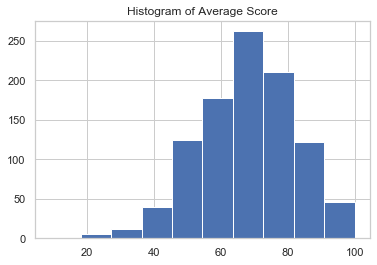

In [9]:
# Check if new average_score variable is normally distributed
plt.hist(student_df['average_score'])
plt.title('Histogram of Average Score')

plt.show()

In [10]:
# Use jarque_bera and normaltest to verify average_score distribution
jb_stats = jarque_bera(student_df['average_score'])
norm_stats = normaltest(student_df['average_score'])

print('Jarque-Bera test statistic is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistic is 15.453387913085168 and p-value is 0.00044089934264401887
Normality test statistic is 15.186721327231322 and p-value is 0.0005037851534494478


The average score is not normally distributed (slightly skewed to the left).

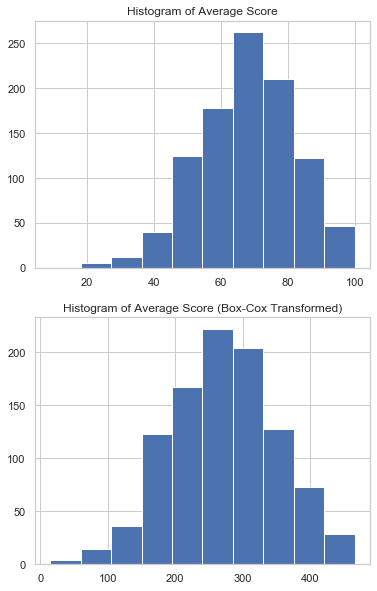

In [11]:
# Apply box-cox transformation to average score
average_boxcox,_ = boxcox(student_df['average_score'])

# Histogram of original average score and box-cox transformed average score
plt.figure(figsize=(6, 10))

plt.subplot(2, 1, 1)
plt.hist(student_df['average_score'])
plt.title('Histogram of Average Score')

plt.subplot(2, 1, 2)
plt.hist(average_boxcox)
plt.title('Histogram of Average Score (Box-Cox Transformed)')

plt.show()

In [12]:
# Use jarque_bera and normaltest to verify box-cox transformed distribution
jb_stats = jarque_bera(average_boxcox)
norm_stats = normaltest(average_boxcox)

print('Jarque-Bera test statistic is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistic is 2.4353989331279 and p-value is 0.2959101356398447
Normality test statistic is 2.779857602227616 and p-value is 0.24909303914726724


Yes, the box-cox transformed average_score variable is normally distributed (fail to reject the null hypothesis for both jarque-bera and normal tests; p-value cutoff of 0.05).

## 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [13]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


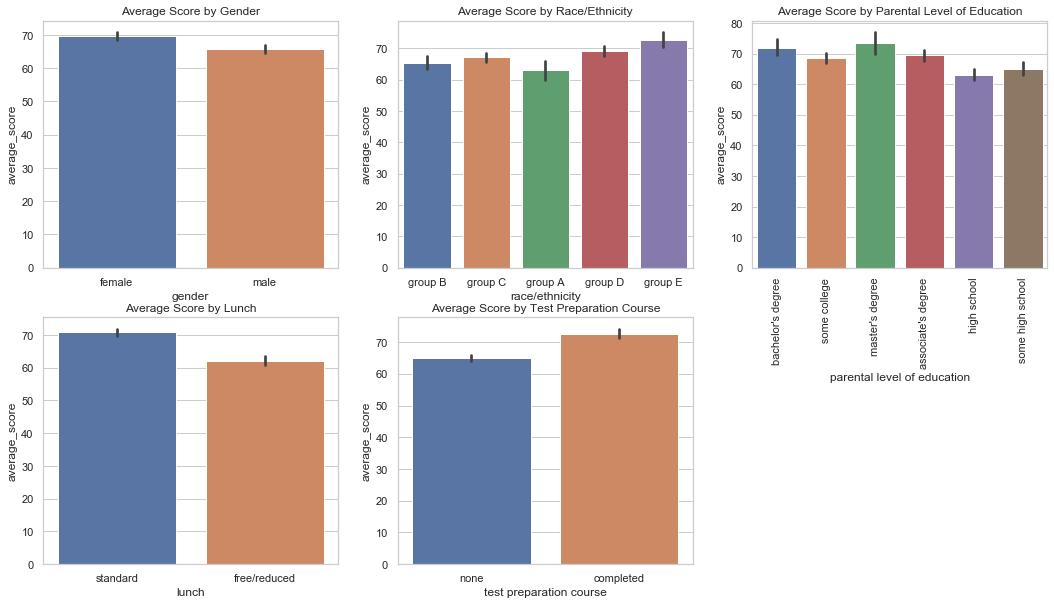

In [15]:
# Average score by gender, race/ethnicity, parental level of education,
# lunch, and test preparation course
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.barplot(student_df['gender'], student_df['average_score'])
plt.title('Average Score by Gender')

plt.subplot(2, 3, 2)
sns.barplot(student_df['race/ethnicity'], student_df['average_score'])
plt.title('Average Score by Race/Ethnicity')

plt.subplot(2, 3, 3)
sns.barplot(student_df['parental level of education'], student_df['average_score'])
plt.xticks(rotation='vertical')
plt.title('Average Score by Parental Level of Education')

plt.subplot(2, 3, 4)
sns.barplot(student_df['lunch'], student_df['average_score'])
plt.title('Average Score by Lunch')

plt.subplot(2, 3, 5)
sns.barplot(student_df['test preparation course'], student_df['average_score'])
plt.title('Average Score by Test Preparation Course')

plt.show()

All five variables seem related to the target variable: Females tend to have higher exam scores than males. Students in groups D and E tend to have higher test scores than students in groups A, B, and C. Students with parents who attended college tend to have higher test scores than students with parents who did not attend college. Students receiving the standard lunch have higher exam scores than students receiving free/reduced lunch (likely due to socioeconomic differences rather than lunch itself). Students who complete the test prep course tend to have higher test scores.

All of these variables could be useful in determining success on exams.
